In [30]:
from lib import *
import matplotlib.pyplot as plt
import imageio.v3 as iio

In [1]:
from typing import Dict
import numpy as np
import os

In [2]:

os.chdir("test_cases")
os.getcwd()

'/home/gmafrac/docs/learning/image_processing_course/enhancement-and-superresolution/test_cases'

In [31]:
def img_subplot(img, subplot, title = ""):
    plt.subplot(subplot)
    plt.imshow(img, cmap = "gray")
    plt.title(title)
    plt.axis("off")

def hist_subplot(img, subplot):
    
    plt.subplot(subplot)
    plt.bar(range(0,256), histogram(img_high, 256))
    plt.xlabel("Graylevel/Intensity")
    plt.ylabel("Frequency")    

In [32]:
img_low, img_high = input("01_low","01_high")

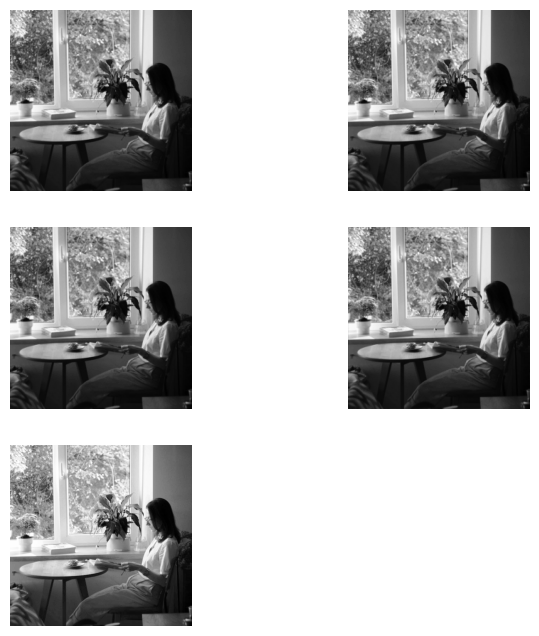

In [33]:
plt.figure(figsize=(8,8))

img_subplot(img_low[0], 321)
img_subplot(img_low[1], 322)
img_subplot(img_low[2], 323)
img_subplot(img_low[3], 324)
img_subplot(img_high, 325)

In [34]:
img_high_calculated = superresolution(img_low)

In [35]:
def test_all_cases(dict_img: Dict[int, np.array], img_high: np.array):
    img_case_0 = superresolution(dict_img) 
    img_case_1 = single_image_cumulative_histogram(dict_img)
    img_case_2 = joint_cumulative_histogram(dict_img)
    img_case_3 = gamma_correction(dict_img, 2)

    plt.figure(figsize=(8,8))
    img_subplot(img_case_0, 321, title=f"Case 0: {rmse(img_high, img_case_0, False):4f}")
    img_subplot(img_case_1, 322, title=f"Case 1: {rmse(img_high, img_case_1, False):4f}")
    img_subplot(img_case_2, 323, title=f"Case 2: {rmse(img_high, img_case_2, False):4f}")
    img_subplot(img_case_3, 324, title=f"Case 3: {rmse(img_high, img_case_3, False):4f} (Gamma = 2)")
    img_subplot(img_high, 325, title= "High Resolution")
    plt.show()

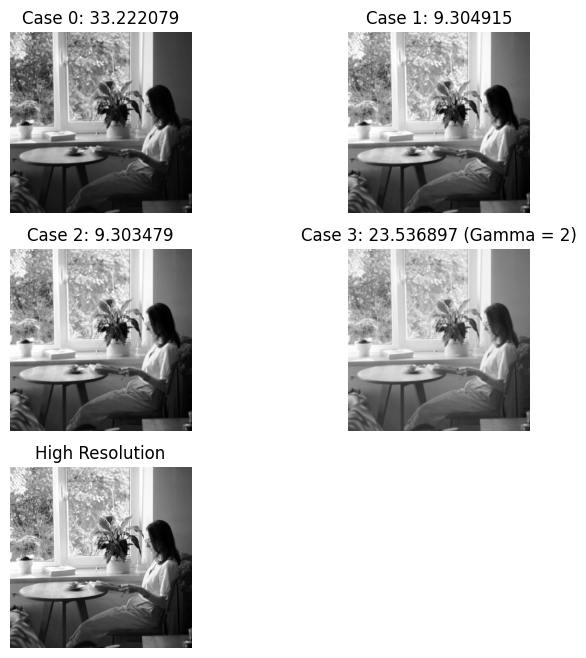

In [36]:
test_all_cases(img_low, img_high)

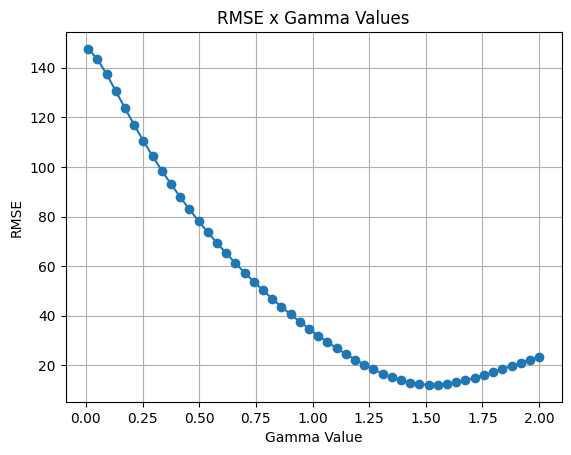

In [37]:
def plot_gamma_x_rmse(img_low: np.array, img_high: np.array):
    gamma_values = np.linspace(0.01, 2.0, 50)
    rmse_values = []

    for gamma in gamma_values:
        corrected_img_low = gamma_correction(img_low, gamma)
        rmse_val = rmse(img_high, corrected_img_low, print_error=False)
        rmse_values.append(rmse_val)
        
    plt.plot(gamma_values, rmse_values, marker='o')
    plt.title('RMSE x Gamma Values')
    plt.xlabel('Gamma Value')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

plot_gamma_x_rmse(img_low, img_high)

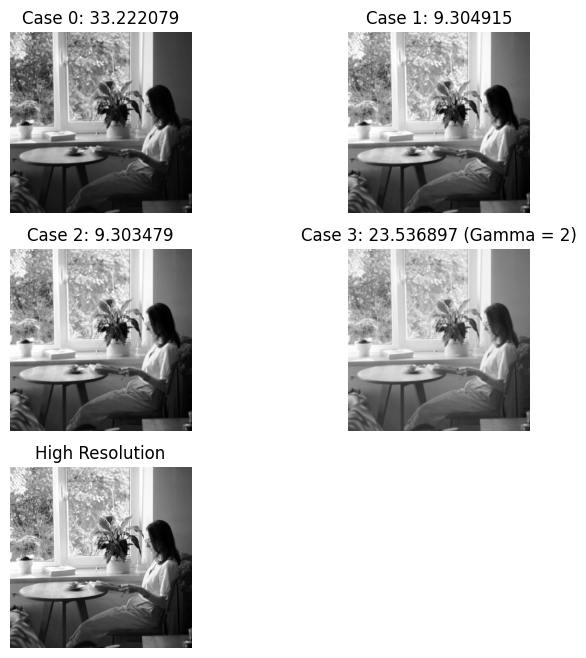

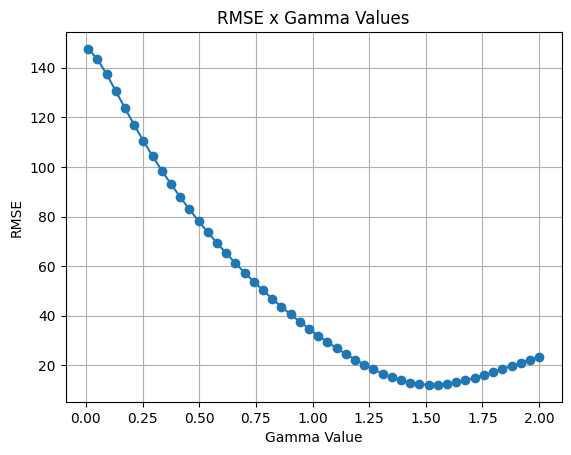

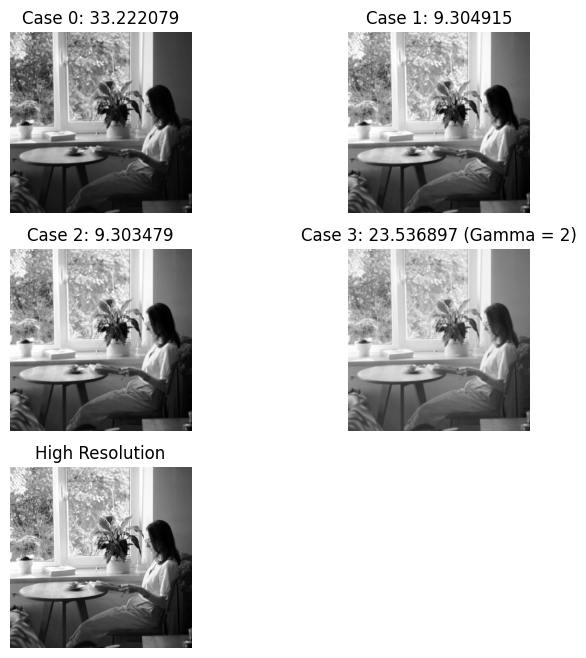

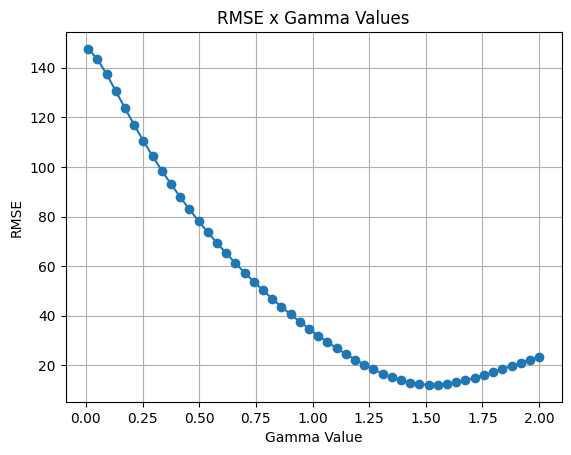

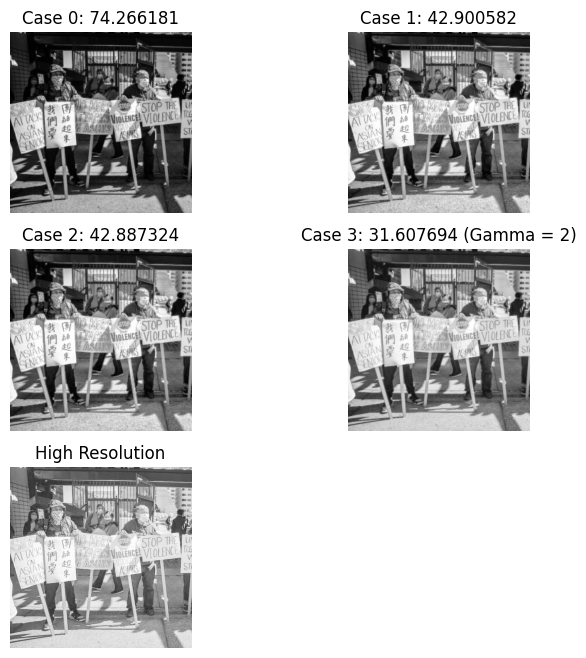

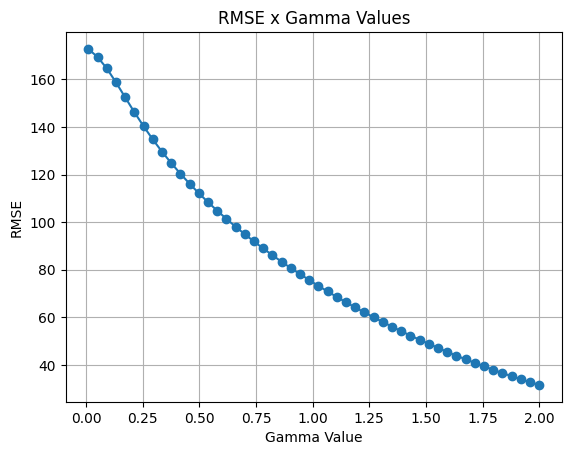

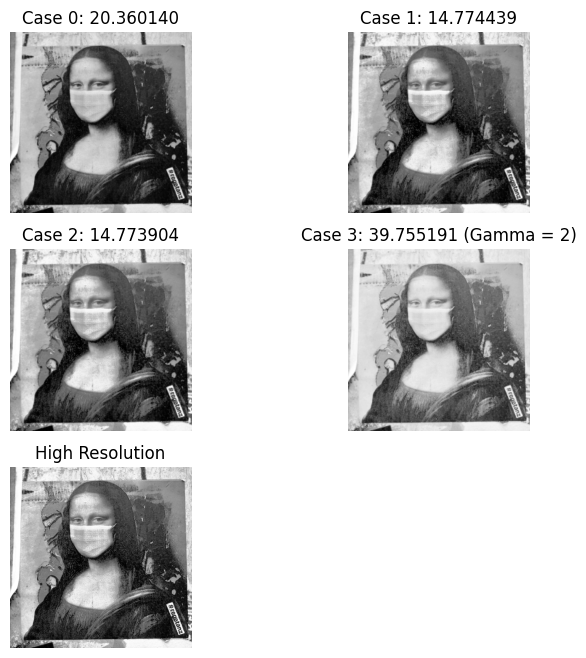

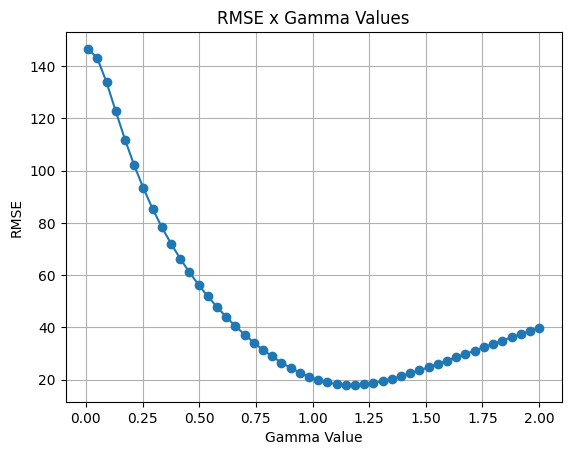

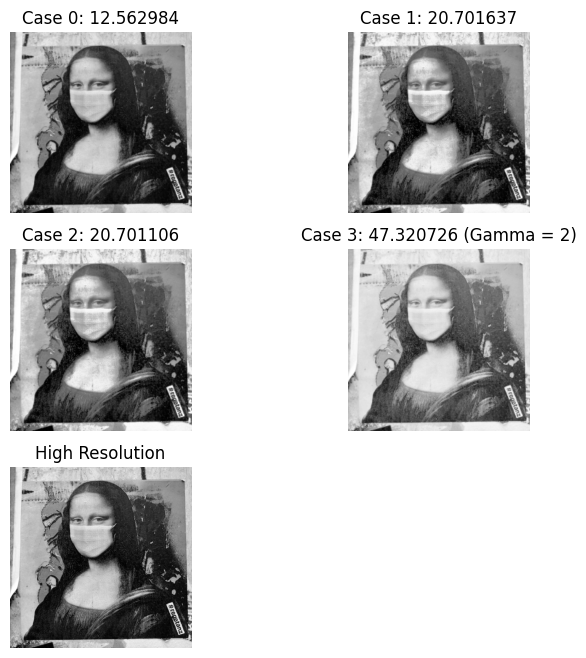

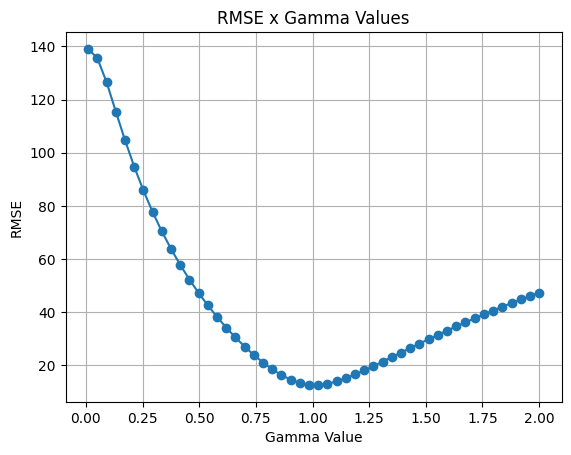

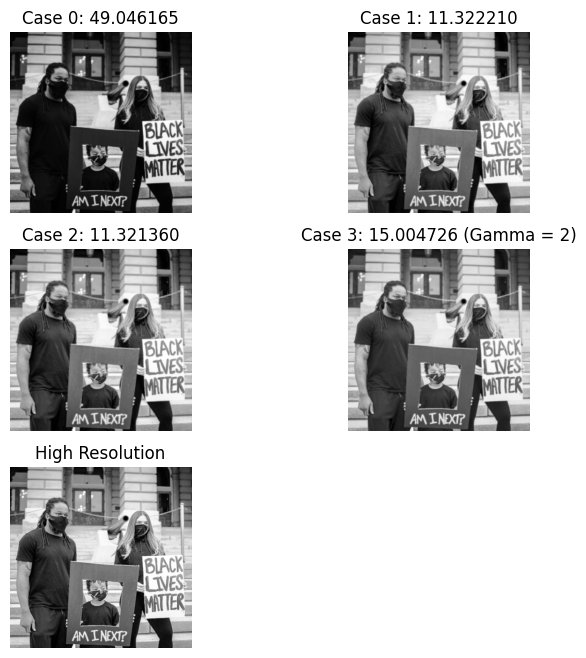

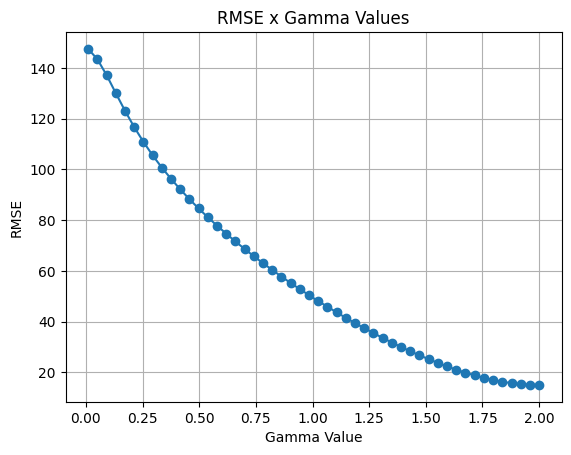

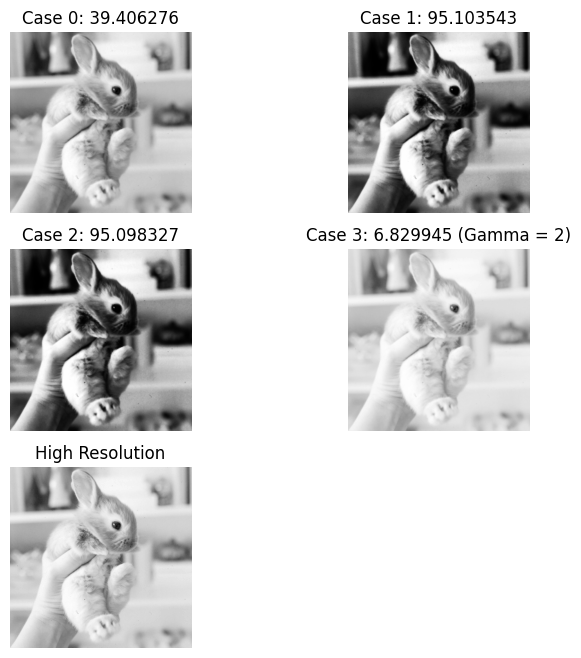

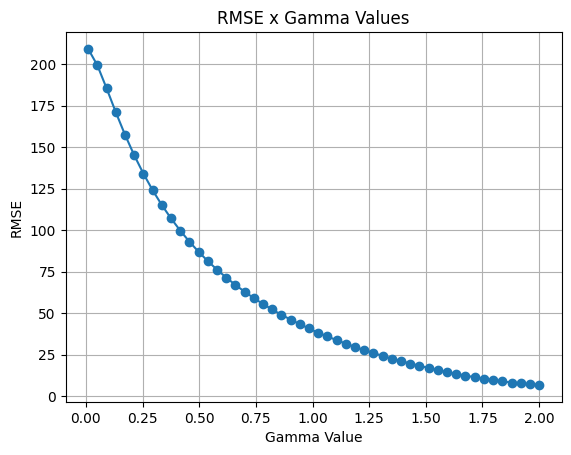

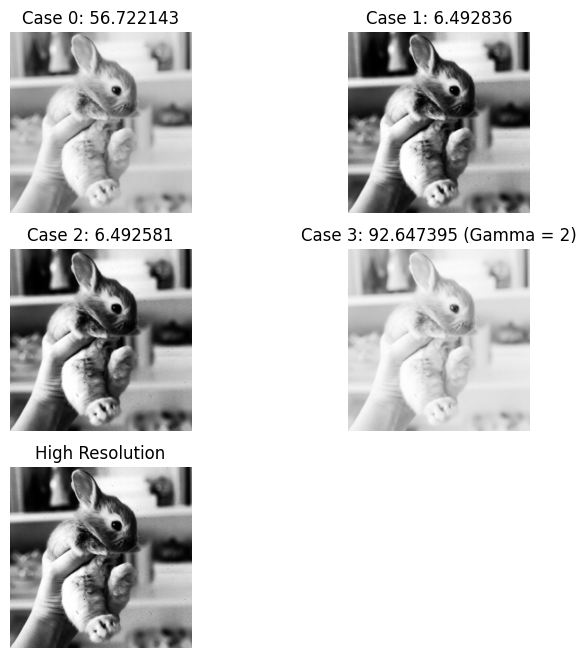

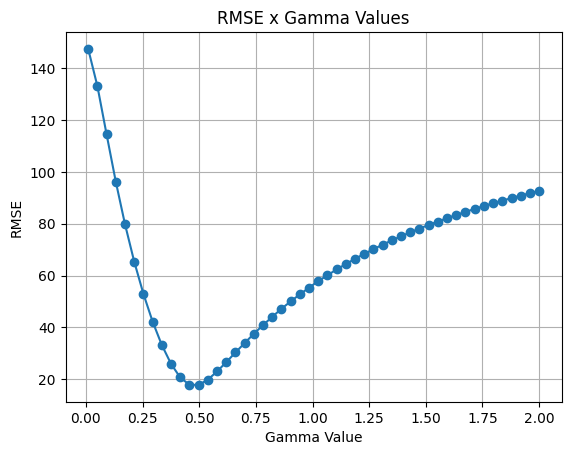

In [38]:
for i in range (1,9):
    img_low, img_high = input(f"0{i}_low", f"0{i}_high")
    test_all_cases(img_low, img_high)
    plot_gamma_x_rmse(img_low, img_high)